# Test EV control

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ev_ssm import ev_ssm
from tqdm import tqdm
import scipy.stats as stats

Revise the EV control logic as: C->I, I->D, SOC high to low

In [2]:
# --- Response ---
from ev_ssm import ev_ssm
import numpy as np

sse = ev_ssm(ts=18, N=10000, step=1, tp=40,
             lr=0.1, lp=40, seed=2022, name="EVA",
             n_pref=1, is_report=True)
sse.load_A("Aest.csv")

evd0 = sse.ev.copy()

# quiet some EVs by force
# np.random.seed(sse.config["seed"])
# ict_rid = np.random.randint(low=0,
#                             high=sse.ev.shape[0],
#                             size=3000)

# sse.ev.na.iloc[ict_rid] = sse.ev.nam.iloc[ict_rid]
# sse.ev.lc.iloc[ict_rid] = 1
# sse.g_u()

# initial EV data
evd0 = sse.ev.copy()

sse.g_frc()

EVA: ts=18[H], 10000 EVs, Total Q=87.7 MWh
Online 2925, Q=73.03 MWh, SoC=0.7717
Power(MW): Pt=-7.9463, Pc=-7.9463, Pd=-0.0
Ctrl: 0=1584; 1=1341; 
EVA: Load A from Aest.csv.


[23.844112764286482, 1.82771328502618]

In [3]:
sse.run(tf=18 + 5/3600, Pi=20,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=False)

EVA MCS: 100%|██████████| 6/6 [00:01<00:00,  4.30it/s]


In [4]:
sse.run(tf=18 + 5/3600, Pi=20,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=False)

sse.run(tf=18 + 60/3600, Pi=25,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=False)

sse.run(tf=18 + 110/3600, Pi=10,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=False)

sse.run(tf=18 + 160/3600, Pi=5,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=False)

# for i in range(10):
#     sse.run(tf=18 + (60+i)/3600, Pi=5-i*0.2,
#             is_updateA=False, is_rstate=True,
#             is_test=False, disable=False)

# sse.run(tf=18 + 100/3600, Pi=0,
#         is_updateA=False, is_rstate=True,
#         is_test=False, disable=False)


EVA: end time 18.00138888888889[H] is too close to start time 18.001388888888894[H],simulation will not start.
EVA MCS: 100%|██████████| 51/51 [00:09<00:00,  5.52it/s]


(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

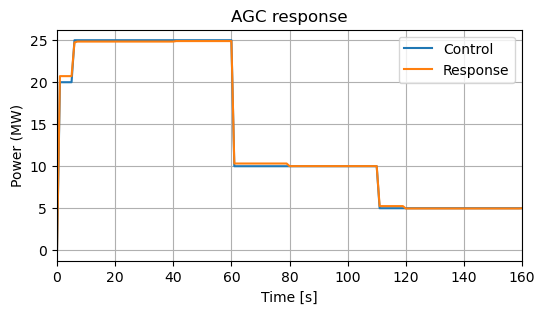

In [5]:
sse.plot_agc()

(<Figure size 600x300 with 2 Axes>,
 <AxesSubplot:title={'center':'EVA'}, xlabel='Time [s]', ylabel='Power (MW)'>)

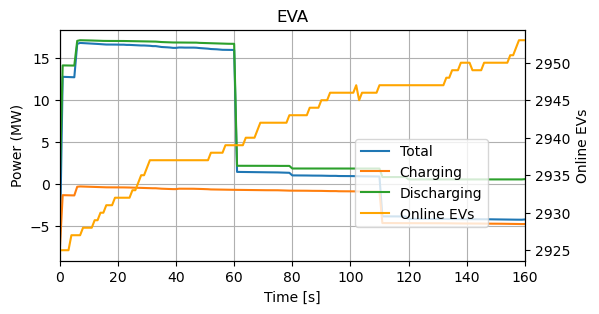

In [10]:
sse.plot()